<h1>Gaussian Regression via Monte Carlo Sampling

This program intents to implement Monte Carlo Sampling method to calculate the values of statistical importance of a gaussian distribution.  
It's first purpose was to calculate the width of a laser spectrum which demonstrated a special form. Although it was developed for a particular laboratorial use, it shows a different method for calculating important characteristics of a gaussian distribution.
Due to this particular spectrum form (gaussian) we can transform it so that it resembles a normal distrubution,
allowing us to apply statistical methods to calculate its width (destribution's standard deviation).  
This process consists of 7 simple steps:  
1. Import excel lab data into python readable data;
2. Transform lab data into probabilistic data using normalization;
3. Draw m samples of size n of the probabilistic data;
4. For each sample calculate its average and standard deviation;
5. Store previous values in a list of mean values and a list of sandard deviations;
6. Now, that we can apply Central Limit Theorem, calculate the mean os each of the 2 lists;
7. For each case (the mean of the means and mean of standard deviations) calculate the confidence intervals.  
  

Here you can see what modules were used.  
Note that some were only used form importation of the data file.

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import os
from scipy.stats import t

<H4>Step 1 - Import excel lab data into python readable data;  

Note that this is from IBM Cloud so you may need to import in a diferent way.

In [10]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e1d9fab2098c455dba92428b364a3fab = ibm_boto3.client(service_name=,
    ibm_api_key_id=,
    ibm_auth_endpoint=,
    config=Config(signature_version=),
    endpoint_url=)

body = client_e1d9fab2098c455dba92428b364a3fab.get_object(Bucket=,Key=)[]
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)


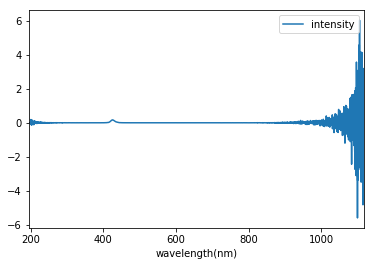

In [3]:
df0=df_data_0[1:]
df0.columns=('wavelength(nm)','intensity')
df0.plot(x='wavelength(nm)',y='intensity')

We are interested in the width of the spectrum near 400, so we must perform some data cleaning.  
Note that I'm paying no attention to the units involved, for they matter little for the porpouse of the method being demonstrated and I intend to be as more general as possible in the presentation of this method. When applied to concrete cases, units should be a matter of some importance and concern.

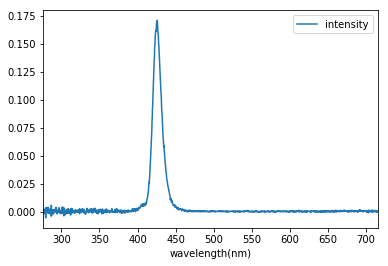

In [4]:
df01=df0[300:2000]
df01.plot(x='wavelength(nm)',y='intensity')

Now we see that a large ammount of data we have at our disposal is not needed, therefore we should remove it, so that it doesn't skew our results.

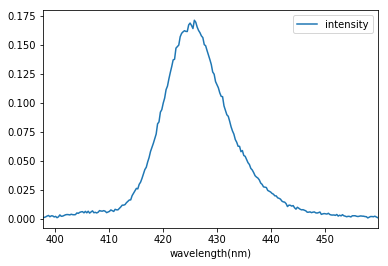

In [5]:
df1=df_data_0[763:1001]
df1.columns=('wavelength(nm)','intensity')
df1.plot(x='wavelength(nm)',y='intensity')

Now we can see a funtion that closely resembles a gaussian ditribution.  
Now we can go into the method.

<h3>Here is the main code.

After the data is imported, it is assigned to the variable **df1**.  
The next step is to convert the panda data into numpy.

In [6]:
#data conversion panda-numpy
df2=df1.values
len(df2)
wavelengths=np.zeros(237)
intensity=np.zeros(237)
i=0
while i<237:
    wavelengths[i]=df2[i+1][0]
    intensity[i]=df2[i+1][1]
    i+=1

<h4> Step 2 - Transform lab data into probabilistic data using normalization;

Now we transform the laboratorial data into probabilistic data by normalizing the function.  
One of the conditions every probability ditributions must satisfy is $$\int_\Lambda f(\lambda)d\lambda = 1$$    
However, since the lab data is not a continuous set, this normalization condition is written as $$\sum_\Lambda f(\lambda_i)=1$$  
  
In this case we have a set of $\lambda_i \in \Lambda$ with the atributed function of **Intensity**, $I(\lambda_i)$.  
To transform this function into a probability ditribution we must create a new function $$f(\lambda_i)=\frac{I(\lambda_i)}{\sum_\Lambda I(\lambda_i)} , \forall \lambda_i \in\Lambda$$  
Now the normalization condition is satisfied by this new function $f(\lambda_i)$.
This process is demonstrated bellow.

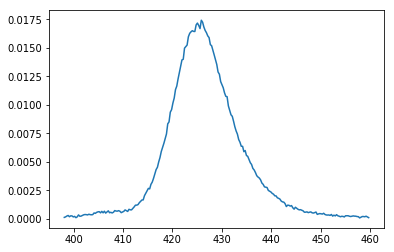

In [7]:
#Data normalization to allow application of statistical methods
C=np.sum(intensity)
Y=intensity/C
Y2=abs(Y)
C2=np.sum(Y2)
Y3=Y2/C2
plt.plot(wavelengths,Y3)

You can see that the vertical axis values have now been changed.
Now that we have transformed the lab results into a probabilistic distrubition, we can apply some statistical methods to determine the width of the spectrum.

<h4> 3 - Draw m samples of size n of the probabilistic data

To create 1 sample of n wavelength values that vollow the intended distribution we must execute the following:

In [8]:
#random sample from distribution
def sample(n):
    s=np.random.choice(wavelengths,n,p=Y3)
    values=np.zeros(2)
    values[0]=np.average(s)
    values[1]=np.std(s)
    return values

The next part of the code does the rest of the job.  
Note that this method rellies on the Central Limit Theorem.
re_sample function does the following:  
1. Generates m random samples, each with n elements, each drawn from the distribution $f(\lambda_i)$;
2. Creates sets $\{\overline{\lambda_1},...\overline{\lambda_m}\}$ and $\{\overline{s_1},...,\overline{s_m}\}$;
3. Calculates average of each of the sets above, as well as standard deviations. (might sound confusin saying standard deviation of standard deviations);
4. Calculates confidence intervals based on the function input for confidence_interval);
5. Prints all the above described values as well as the corresponding confidence intervals (by use of Central Limit Theorem);
6. Shows the graph.  
Note that only one graph shows (graph for standard deviations) because this was the purpouse of the method. 
With this we can succesfully calculate the width of the laser spectrum with controlled precision.

In [9]:
#Sampling of the average values and std from previous function
#Basically this part repeats the sample function m times and collects m average values and m std's
def re_sample(n,m,confidence_interval):
    s2_average=np.zeros(m)
    s2_std=np.zeros(m)
    i=0
    while i<m:
        s2_average[i]=sample(n)[0]
        s2_std[i]=sample(n)[1]
        i+=1
    mc_ave_average=np.average(s2_average) #average of the average
    mc_std_average=np.std(s2_average) #average's std
    mc_ave_std=np.average(s2_std) #average std
    mc_std_std=np.std(s2_std) #std of std
    results=(mc_ave_average,mc_std_average,mc_ave_std,mc_std_std)
    ci_ave_low=mc_ave_average-mc_ave_std*t.ppf((1+confidence_interval)/2,m-1)
    ci_ave_high=mc_ave_average+mc_ave_std*t.ppf((1+confidence_interval)/2,m-1)
    ci_std_low=mc_ave_std-mc_std_std*t.ppf((1+confidence_interval)/2,m-1)
    ci_std_high=mc_ave_std+mc_std_std*t.ppf((1+confidence_interval)/2,m-1)
    
    results = {'quantity':['value','value´s std','value´s std %','value´s low confidence interval','value´s high confidence interval'],
              'average':[mc_ave_average,mc_std_average,(mc_std_average/mc_ave_average)*100,ci_ave_low,ci_ave_high],
              'std':[mc_ave_std,mc_std_std,(mc_std_std/mc_ave_std)*100,ci_std_low,ci_std_high]}
    results_2=pd.DataFrame(data=results)
    
    print(results_2)  
    plt.hist(s2_std,100)
    plt.show()

To execute the code and get the desired calculation you should run **re_sample(n,m,confidence_interval)** as shown bellow.

                           quantity     average       std
0                             value  426.696388  7.711061
1                       value´s std    0.077129  0.074346
2                     value´s std %    0.018076  0.964143
3   value´s low confidence interval  411.579937  7.565316
4  value´s high confidence interval  441.812839  7.856805


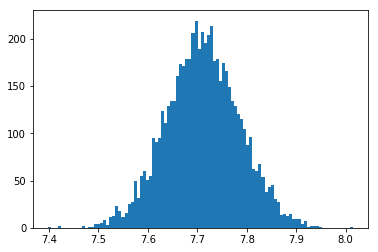

In [10]:
re_sample(10000,6000,0.95)

As we can see, this method gives us a fairly good estimation of the desired values we, otherwise, might not been able to extract.
By simple observation of the initial graph we are not able to determine the needed values. For that we need a regression, however, here we have an alternative.
If you think, we estimated exact values using pseudo-random numbers and 'coin tossing' to calculate exact values, with user controlled precision.